## Title: Final Project Outline
### By: Jazmine Veliz, 

### Abstract


3-4 sent. summary of the final project.

### Introduction & Background

Convince your audience that the rest of the project is worth learning about. What interesting problem are you exploring? Why should EVERYONE be interested in your analysis?

### Data Used

Give some background about your data. Where did you get it? How was it compiled? How many observations? What are the variables?

Show a data frame with the most important columns.

Do some descriptive statistics and talk about the results.

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

In [26]:
file_name = 'Data/Student_Stress_Dataset.csv'
DF = pd.read_csv(file_name)
show(DF)

In [32]:
DF.shape

(100, 20)

In [28]:
DF.keys()

Index(['Student_ID', 'Age', 'Gender', 'Year_of_Study', 'Family_Support',
       'Student_Behavior', 'Placement_Status', 'Sleep_Hours',
       'Academic_Stress_Level', 'Financial_Stress_Level',
       'Family_Stress_Level', 'Emotional_Stress_Level', 'Total_Stress_Level',
       'Main_Stress_Source', 'Counseling_Need', 'Proposed_Remedy',
       'Coping_Mechanisms_Used', 'Risky_Behaviors_Engaged', 'CGPA',
       'Parental_Income'],
      dtype='object')

In [262]:
vari=['Age','Family_Support','Student_Behavior','Sleep_Hours','Total_Stress_Level','Main_Stress_Source','Parental_Income','CGPA','Coping_Mechanisms_Used']
DF_model1=DF[vari]
show(DF_model1)

In [264]:
DF_model1.keys()

Index(['Age', 'Family_Support', 'Student_Behavior', 'Sleep_Hours',
       'Total_Stress_Level', 'Main_Stress_Source', 'Parental_Income', 'CGPA',
       'Coping_Mechanisms_Used'],
      dtype='object')

**I created a new data frame, DF_model1, with the columns that I believe are the most important. These colums are 'Age', 'Family_Support', 'Student_Behavior', 'Sleep_Hours', 'Total_Stress_Level', 'Main_Stress_Source', 'Parental_Income', 'CGPA', and 'Coping_Mechanisms_Used'.**

In [268]:
DF_model1.dtypes

Age                         int64
Family_Support             object
Student_Behavior           object
Sleep_Hours                 int64
Total_Stress_Level          int64
Main_Stress_Source         object
Parental_Income             int64
CGPA                      float64
Coping_Mechanisms_Used     object
dtype: object

In [271]:
DF_model1.describe()

,Age,Sleep_Hours,Total_Stress_Level,Parental_Income,CGPA
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,21.200000,5.920000,21.040000,35546.470000,3.018200
std,1.912215,1.454217,5.811726,13276.457978,0.530954
min,18.000000,4.000000,10.000000,15444.000000,2.010000
25%,20.000000,5.000000,17.750000,22929.250000,2.617500
50%,21.000000,6.000000,21.000000,36009.500000,3.010000
75%,23.000000,7.000000,25.000000,47485.000000,3.447500
max,24.000000,8.000000,37.000000,59932.000000,3.990000


**I couldn't do descriptive statistics on 4 out of the 9 colums because they were objects; 'Family_Support', 'Student_Behavior', 'Main_Stress_Source', and 'Coping_Mechanisms_Used'.**

**However I found that the median age for the students in this data is 21 and that the majority of the students are young adults. Also I found that the average hours of sleep that the students receive is 6 hours, which is good but not great. The avergae stress level for the student is 21, which is high considering that the minimum is 10.**

### Exploratory Data Analysis

Show a few plots or some data tables that help your reader understand your data better. What are some initial questions that you were able to quickly answer? How do those questions lead you to a deeper analysis?

In [274]:
print(DF_model1['Age'].value_counts())
print('---------------------------')
print(DF_model1['Family_Support'].value_counts())
print('---------------------------')
print(DF_model1['Student_Behavior'].value_counts())
print('---------------------------')
print(DF_model1['Sleep_Hours'].value_counts())
print('---------------------------')
print(DF_model1['Total_Stress_Level'].value_counts())
print('---------------------------')
print(DF_model1['Main_Stress_Source'].value_counts())
print('---------------------------')
print(DF_model1['Parental_Income'].value_counts())
print('---------------------------')
print(DF_model1['CGPA'].value_counts())
print('---------------------------')
print(DF_model1['Coping_Mechanisms_Used'].value_counts())

Age
24    20
20    19
19    18
21    18
23    10
22    10
18     5
Name: count, dtype: int64
---------------------------
Family_Support
Low       41
High      32
Medium    27
Name: count, dtype: int64
---------------------------
Student_Behavior
Reactive      30
Aggressive    26
Reserved      22
Positive      22
Name: count, dtype: int64
---------------------------
Sleep_Hours
4    23
5    20
8    20
6    19
7    18
Name: count, dtype: int64
---------------------------
Total_Stress_Level
18    10
21     9
16     8
20     7
24     7
25     6
19     6
22     5
23     5
26     4
14     4
27     4
13     4
12     4
28     3
11     2
29     2
36     1
17     1
34     1
31     1
30     1
15     1
10     1
37     1
33     1
35     1
Name: count, dtype: int64
---------------------------
Main_Stress_Source
Academic     34
Financial    30
Family       19
Emotional    17
Name: count, dtype: int64
---------------------------
Parental_Income
16626    1
39540    1
21331    1
48483    1
16146    1
  

**I created value counts for each of the columns in the new data frame. From the value counts alone it's clear that most students have low familial support, are either aggressive or reactive, run on low hours of sleep, have 4 main stress sources (Academic, Financial, Familial, and Emotional) with academic being the highest, and that most of the students journal as a coping mechanism and very few students exercise as a coping mechanism.** 

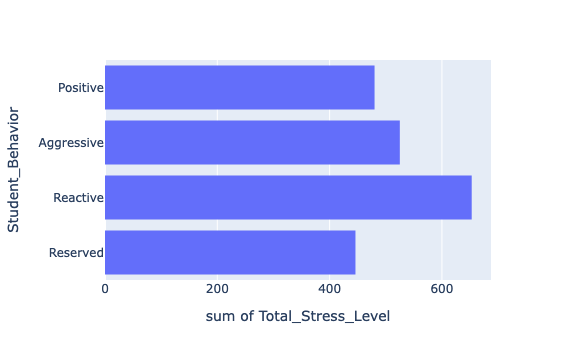

In [277]:
fig=px.histogram(DF_model1,x='Total_Stress_Level',y='Student_Behavior')
fig.show()

**Students that are labeled as 'reactive' have a higher stress level than the students that are labeled as 'reserved'. THE HIGHER THE STRESS LEVEL THE WORSE THE BEHAVIOR**

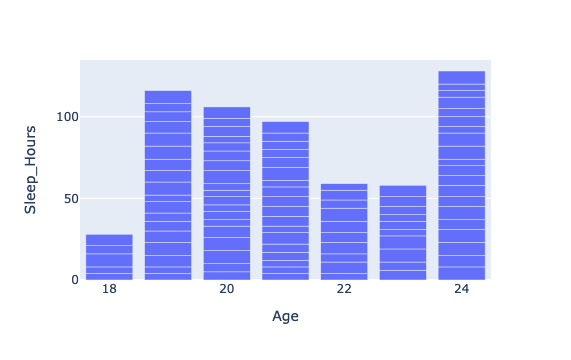

------------------------------------------------------------------


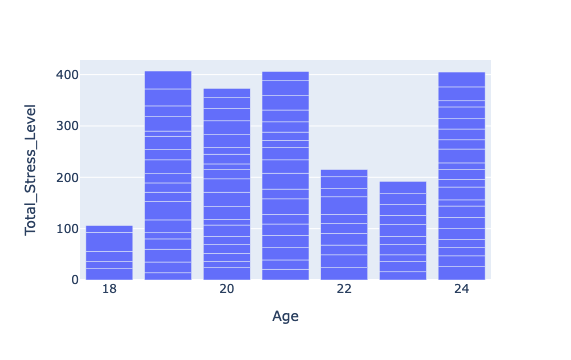

In [280]:
fig=px.bar(DF_model1,x='Age',y='Sleep_Hours')
fig.show()
print('------------------------------------------------------------------')

fig=px.bar(DF_model1,x='Age',y='Total_Stress_Level')
fig.show()

**??**

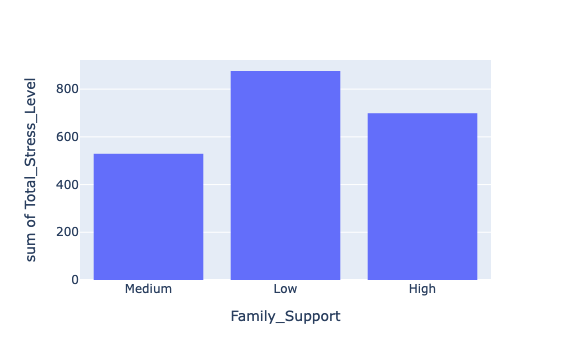

In [283]:
fig=px.histogram(DF_model1,x='Family_Support',y='Total_Stress_Level')
fig.show()

**The students with low familial support have the highest total stress levels.**

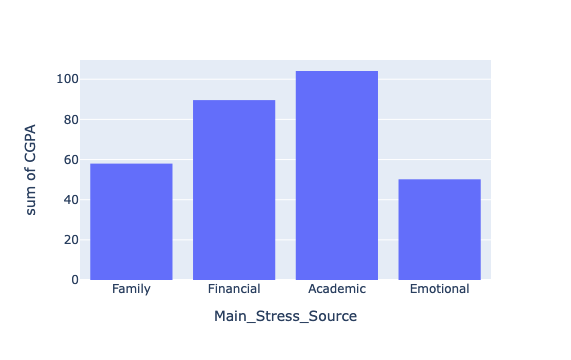

In [286]:
fig=px.histogram(DF_model1,x='Main_Stress_Source',y='CGPA')
fig.show()

**The students that stress more on their academics have an overall higher GPA in comparison to the students who stress more about their financial state, their family, or their emotions. WHEN ACADEMIC IS THEIR MAIN FOCUS, THEY PREFORM BETTER**

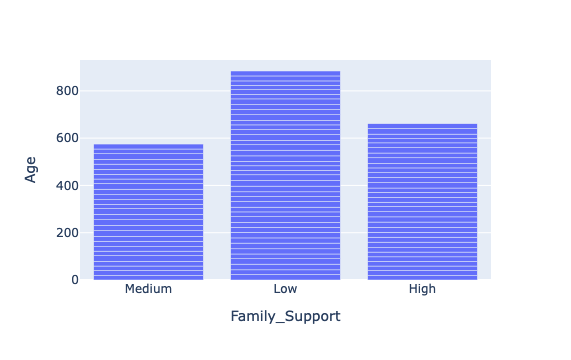

In [289]:
fig=px.bar(DF_model1,x='Family_Support',y='Age')
fig.show()

### Proposed Questions

What specific questions are you going to explore and present in the rest of the paper? Give a very brief overview of what you are going to do to answer those questions. Imagine this as a road map so your reader knows what to expect.

1) How can a student's family impact their success?

- Compare a family's total income and whether or not they provide support to the student.
- Compare whether or not a student's focuses more on financial and/or familial stress when they aren't given support.
- Compare how all this affects their CGPA
   
2) Can the student do any lifestyle changes to increase their chances of success?

- Compare the student's hours of sleep to their CGPA
- Compare the student's hours of sleep to their total stress level
- Examine if changes to their hours of sleep affect their behavior and CGPA

### Analysis & Results

Here is where you show your code and results (plots, tables, predictions, etc) that help to explore and answer your questions. There should be code here that can be run to reproduce your results and conclusions. After each plot/table/final number, you should add a Markdown cell where you explain to the reader what the result means and how/why it answers the question.

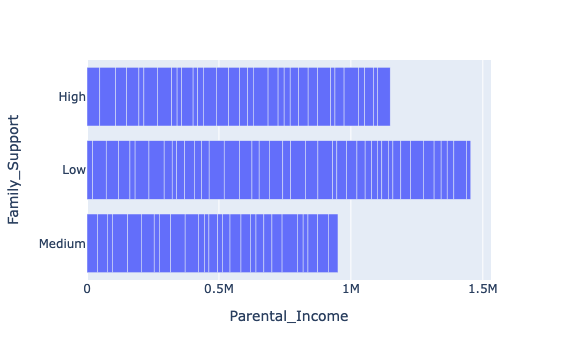

----------------------------------------------------------------------


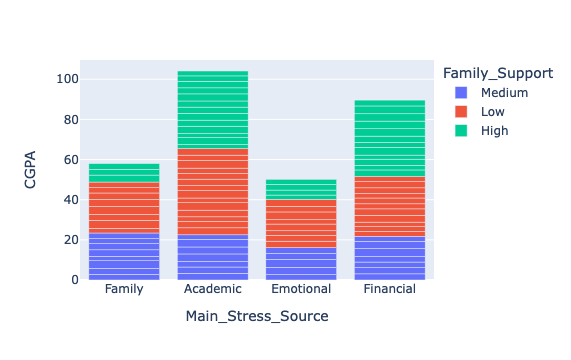

In [294]:
fig=px.bar(DF_model1,x='Parental_Income',y='Family_Support')
fig.show()
print('----------------------------------------------------------------------')

fig=px.bar(DF_model1,x='Main_Stress_Source',y='CGPA',color='Family_Support')
fig.show()

**Students are stressed more about their family and emtions when they lower familial support. And their CGPA's are also lower in comparison to the students who have high familial support. However, this plot proved that students don't stress more on their finances because they have low familial support since the percentage of family support is pretty high.**

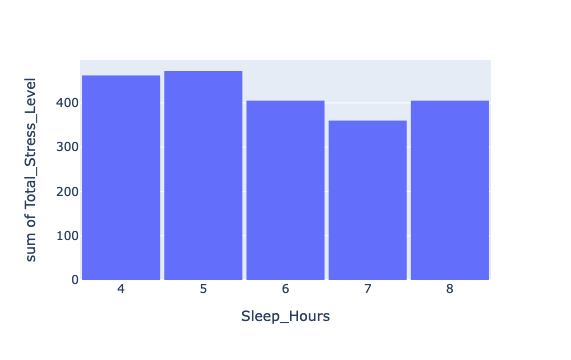

--------------------------------------------------------------------


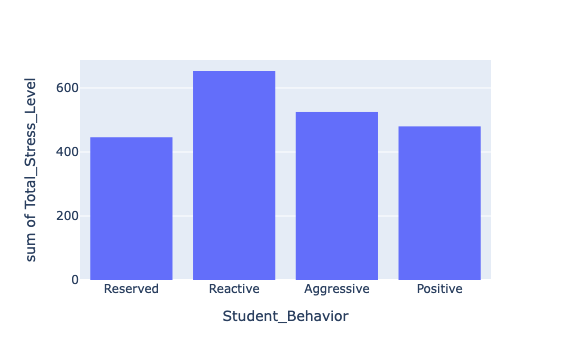

In [297]:
fig=px.histogram(DF_model1,x='Sleep_Hours',y='Total_Stress_Level')
fig.update_layout(bargap=.05)
fig.show()
print('--------------------------------------------------------------------')
fig=px.histogram(DF_model1,x='Student_Behavior',y='Total_Stress_Level')
fig.show()

**The first plot proves that if a student gets more hours of sleep than their total stress level will decrease. To go along with that, the second plot proves that students with 'troublesome' behavior have a higher stress level in comparison to the student with 'good' behavior. So, a clear relationship is that a student will behave better if their total stress level decreases, which if they get more hours of sleep, than it will. CHANGING THEIR SLEEP SCHEDULE WILL CREATE LESS STRESS AND BETTER BEHAVIOR**

In [300]:
DF_model1['Sleep_Hours'].value_counts()

Sleep_Hours
4    23
5    20
8    20
6    19
7    18
Name: count, dtype: int64

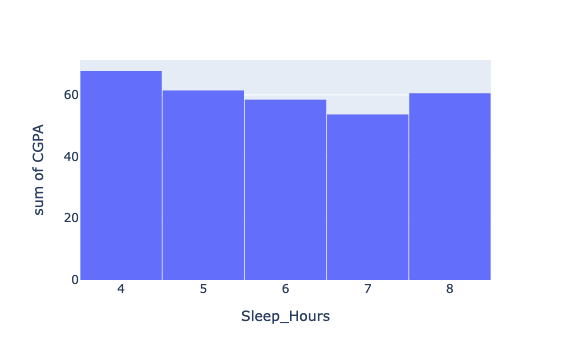

In [302]:
fig=px.histogram(DF_model1,x='Sleep_Hours',y='CGPA',nbins=5)
fig.update_layout(bargap=0.01)
fig.show()

**This plot is tricky. It proves that less hours of sleep create a higher GPA?**

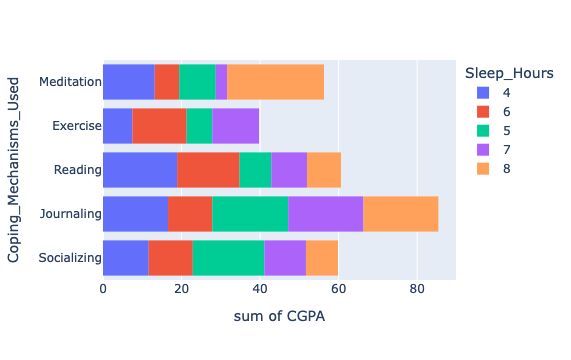

In [304]:
fig=px.histogram(DF_model1,x='CGPA',y='Coping_Mechanisms_Used',color='Sleep_Hours')
fig.show()

**The students who journal and read have higher GPA's in comparison to the students who meditate, exercise, and socialize to cope (the students who journal also get between 7 and 8 hours of sleep). STUDENTS WHO UTILIZE COPING MECHANISMS THAT CHALLENGE THEIR BRAINS HAVE A HIGHER GPA**

### Conclusion


Give a brief statement about what you achieved in your analysis, what issues or limitations your analysis contains, a conversation of any ethical concerns with the data or analysis, and some possible future directions (if you had more time an money to keep going).
